In [10]:
pip install autokeras

  Using cached autokeras-1.0.12-py3-none-any.whl (164 kB)
  Using cached keras_tuner-1.0.2-py3-none-any.whl
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
  Using cached terminaltables-3.1.0-py3-none-any.whl


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import autokeras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11493376/11490434 [==============================] - 10s 1us/step
(60000, 28, 28)
(60000,)
[5 0 4]


In [2]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)


# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 00m 53s]
val_loss: 0.038733888417482376

Best val_loss So Far: 0.038733888417482376
Total elapsed time: 00h 00m 53s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3007 - accuracy: 0.9064
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0816 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0487 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9888
Epoch 9/

In [100]:
# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = '/home/baatutech/Documents/TensorflowOD/workspace/training_demo/exported-models/my_model1/'
VIDEO_NAME = '/home/baatutech/Downloads/Video_04.mp4'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'/home/baatutech/Documents/TensorflowOD/workspace/training_demo/exported-models/my_model1/saved_model/saved_model.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','/home/baatutech/Documents/TensorflowOD/workspace/training_demo/annotations/label_map.pbtxt')

# Path to video
PATH_TO_VIDEO = os.path.join(CWD_PATH,VIDEO_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 6

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

'''
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = compat.as_bytes(fid.read())
       # od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

        sess = tf.Session(graph=detection_graph)
'''
detection_graph = tf.compat.v1.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph =compat.as_bytes(fid.read())
        sm=saved_model_pb2.SavedModel()
        sm.ParseFromString(serialized_graph)
        
        #od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(sm.meta_graphs[0].graph_def)   
    
    
    
    
image_tensor = 'image_tensor:0'
boxes = 'detection_boxes:0'
scores = 'detection_scores:0'
classes = 'detection_classes:0'
num_detections = 'num_detections:0'

'''
output_dict = sess.run([boxes, scores, classes, num_detections],
                feed_dict={image_tensor: np.expand_dims(img, 0)})

# Define input and output tensors (i.e. data) for the object detection classifier
#image_tensor = 'image_tensor:0'
# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')
'''
# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)

while(video.isOpened()):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_expanded = np.expand_dims(frame_rgb, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: frame_expanded})

    # Draw the results of the detection (aka 'visulaize the results')
    vis_util.visualize_boxes_and_labels_on_image_array(
        frame,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.60)

    # All the results have been drawn on the frame, so it's time to display it.
    cv2.imshow('Object detector', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break
        



# Clean up

cv2.destroyAllWindows()
video.release()

error: OpenCV(4.5.1) /tmp/pip-req-build-jhawztrk/opencv/modules/highgui/src/window.cpp:645: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [94]:
videoFile = "/home/baatutech/Downloads/Video_04.mp4"

cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = '/home/baatutech/Downloads/image' +  str(int(x)) + ".jpg";x+=1
        cv2.imwrite(filename, frame)

cap.release()
print ("Done!")

Done!


In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
img_path = '/home/baatutech/Desktop/test/8.jpg'
img = image.load_img(img_path, target_size=(28, 28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

[[[[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  ...

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [1

TypeError: Invalid shape (1, 28, 28, 3) for image data

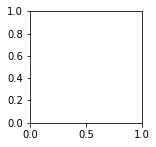

In [6]:
print(x)
import matplotlib.pyplot as plt
plt.matshow(x)